# Classification news articles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from keras.preprocessing.text import text_to_word_sequence
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import scikitplot as skplt
import gensim
from datetime import timedelta
import os
from scipy import sparse
from prettytable import PrettyTable
import re
import pickle
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhelg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


## EDA:

In [175]:
gs = pd.read_csv("english_5K_label_final.csv")

In [176]:
gs.head()

,Unnamed: 0,Unnamed: 0.1,index,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,...,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,title,text,summary,summary_wrap,lab_final
0,0,0,25090,896079819,19200101,192001,1920,1920.0027,ELI,RETIRED,...,18.5333,73.8667,-2108361,20200101044500,https://punemirror.indiatimes.com/pune/cover-s...,pmc threatens to seize house of ex i t comm wh...,PMC threatens to seize house of ex I-T comm wh...,"In this light, he had also sent a legal notice...","In this light, he had also sent a legal notice...",Irrelevant
1,1,1,33280,896089642,19200101,192001,1920,1920.0027,COP,POLICEMAN,...,27.2494,79.3139,10451923,20200101070000,https://www.mid-day.com/articles/mentalhood-ta...,mentalhood tandav the family man 2 breathe 2 s...,"\nMentalhood, Tandav, The Family Man 2, Breath...","Mirzapur 2Cast: Ali Fazal, Shweta Tripathi, Ra...","Mirzapur 2Cast: Ali Fazal, Shweta Tripathi, Ra...",Irrelevant
2,2,2,34788,896095544,19200101,192001,1920,1920.0027,COP,POLICE,...,21.1500,79.1000,-2105396,20200101081500,https://www.nagpurtoday.in/in-pic-nagpur-polic...,in pic nagpur police extend new years greeting...,In Pic: Nagpur Police extend New Year's greeti...,Nagpur: Amid cloudy day and chilling night the...,Nagpur: Amid cloudy day and chilling night the...,Irrelevant
3,3,3,35500,896092971,19200101,192001,1920,1920.0027,COP,POLICE,...,18.5333,73.8667,-2108361,20200101074500,https://www.timesnownews.com/the-buzz/article/...,man asks for some drugs in exchange for dealer...,\n\n\nPune Police Twitter | Man asks for some ...,Pune police's witty response to man wins Twitt...,Pune police's witty response to man wins Twitt...,Irrelevant
4,4,4,47722,896113974,19200101,192001,1920,1920.0027,HLH,NURSE,...,28.6667,77.2167,-2094230,20200101114500,https://medicaldialogues.in/icmr-aiims-emergen...,icmr aiims emergency mobile service initiative...,ICMR-AIIMS emergency mobile service initiative...,New Delhi: People living within a 5-km radius ...,New Delhi: People living within a 5-km radius ...,Irrelevant


In [177]:
gs = gs.rename(columns={"lab_final":"class"})

In [178]:
gs = gs.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [179]:
gs.head()

,index,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,...,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL,title,text,summary,summary_wrap,class
0,25090,896079819,19200101,192001,1920,1920.0027,ELI,RETIRED,NaN,NaN,...,18.5333,73.8667,-2108361,20200101044500,https://punemirror.indiatimes.com/pune/cover-s...,pmc threatens to seize house of ex i t comm wh...,PMC threatens to seize house of ex I-T comm wh...,"In this light, he had also sent a legal notice...","In this light, he had also sent a legal notice...",Irrelevant
1,33280,896089642,19200101,192001,1920,1920.0027,COP,POLICEMAN,NaN,NaN,...,27.2494,79.3139,10451923,20200101070000,https://www.mid-day.com/articles/mentalhood-ta...,mentalhood tandav the family man 2 breathe 2 s...,"\nMentalhood, Tandav, The Family Man 2, Breath...","Mirzapur 2Cast: Ali Fazal, Shweta Tripathi, Ra...","Mirzapur 2Cast: Ali Fazal, Shweta Tripathi, Ra...",Irrelevant
2,34788,896095544,19200101,192001,1920,1920.0027,COP,POLICE,NaN,NaN,...,21.1500,79.1000,-2105396,20200101081500,https://www.nagpurtoday.in/in-pic-nagpur-polic...,in pic nagpur police extend new years greeting...,In Pic: Nagpur Police extend New Year's greeti...,Nagpur: Amid cloudy day and chilling night the...,Nagpur: Amid cloudy day and chilling night the...,Irrelevant
3,35500,896092971,19200101,192001,1920,1920.0027,COP,POLICE,NaN,NaN,...,18.5333,73.8667,-2108361,20200101074500,https://www.timesnownews.com/the-buzz/article/...,man asks for some drugs in exchange for dealer...,\n\n\nPune Police Twitter | Man asks for some ...,Pune police's witty response to man wins Twitt...,Pune police's witty response to man wins Twitt...,Irrelevant
4,47722,896113974,19200101,192001,1920,1920.0027,HLH,NURSE,NaN,NaN,...,28.6667,77.2167,-2094230,20200101114500,https://medicaldialogues.in/icmr-aiims-emergen...,icmr aiims emergency mobile service initiative...,ICMR-AIIMS emergency mobile service initiative...,New Delhi: People living within a 5-km radius ...,New Delhi: People living within a 5-km radius ...,Irrelevant


In [180]:
gs['class'].value_counts()

Irrelevant                            4207
Case_progress                          289
Harassment                             235
DV                                     233
Measures                               154
Verbal_Online_Harassment                52
MurderSuicide                           41
DVHarassment                             4
HarassmentMurderSuicide                  3
MurderSuicideHarassment                  2
Verbal_Online_HarassmentHarassment       2
MeasuresCase_progress                    1
DVMurderSuicide                          1
DVCase_progress                          1
HarassmentVerbal_Online_Harassment       1
HarassmentDV                             1
Name: class, dtype: int64

In [181]:
gs.loc[gs['class']=='DVMurderSuicide','class']='DV'
gs.loc[gs['class']=='DVCase_progress','class']='DV'
gs.loc[gs['class']=='MeasuresCase_progress','class']='Measures'
gs.loc[gs['class']=='Verbal_Online_HarassmentHarassment','class']='Verbal_Online_Harassment'
gs.loc[gs['class']=='HarassmentVerbal_Online_Harassment','class']='Verbal_Online_Harassment'
gs.loc[gs['class']=='DVHarassment','class']='DV'
gs.loc[gs['class']=='HarassmentDV','class']='DV'
gs.loc[gs['class']=='HarassmentMurderSuicide','class']='MurderSuicide'
gs.loc[gs['class']=='MurderSuicideHarassment','class']='MurderSuicide'

In [9]:
gs['class'].value_counts()

Irrelevant                  4207
Case_progress                289
DV                           240
Harassment                   235
Measures                     155
Verbal_Online_Harassment      55
MurderSuicide                 46
Name: class, dtype: int64

In [182]:
gs.loc[gs['class']=='Measures','class']='Harassment'
gs.loc[gs['class']=='Verbal_Online_Harassment','class']='Harassment'
gs.loc[gs['class']=='MurderSuicide','class']='Harassment'
gs.loc[gs['class']=='Case_progress','class']='Harassment'

In [183]:
gs['class'].value_counts()

Irrelevant    4207
Harassment     780
DV             240
Name: class, dtype: int64

In [184]:
gs_cl = gs[['class','text']]

In [185]:
gs_cl.head()

,class,text
0,Irrelevant,PMC threatens to seize house of ex I-T comm wh...
1,Irrelevant,"\nMentalhood, Tandav, The Family Man 2, Breath..."
2,Irrelevant,In Pic: Nagpur Police extend New Year's greeti...
3,Irrelevant,\n\n\nPune Police Twitter | Man asks for some ...
4,Irrelevant,ICMR-AIIMS emergency mobile service initiative...


In [186]:
final_df = gs_cl

In [187]:
final_df.shape

(5227, 2)

In [188]:
# seeing the duplicate rows 
final_df[final_df.duplicated(keep=False)]

,class,text
5,Harassment,\n\n\n\n\n\n\n\n\n\n\n\nDelhi HC dismisses ple...
6,Harassment,\n\n\n\n\n\n\n\n\n\n\n\nDelhi HC dismisses ple...
7,Harassment,Delhi HC dismisses plea seeking FIR registrati...
8,Harassment,Delhi HC dismisses plea seeking FIR registrati...
78,Irrelevant,\n\n\n\n\n\n\n\n\n\n\n\nCourt extends judicial...
...,...,...
5101,Irrelevant,"Bollywood: As Lockdown 4.0 begins, Salman Khan..."
5121,Irrelevant,\n\n\n\n\n\n\nMHA grants exemption from lockdo...
5122,Irrelevant,\n\n\n\n\n\n\nMHA grants exemption from lockdo...
5123,Irrelevant,\n\n\n\n\n\n\nMHA grants exemption from lockdo...


In [189]:
# lets drop the duplicated ones
final_df = final_df.drop_duplicates()
final_df.shape

(4938, 2)

## Vectorization:

In [190]:
for sent in final_df['text'].values[:50]:
    if len(re.findall('[?|!|\'|"|#]', sent)):
        print(sent)

PMC threatens to seize house of ex I-T comm who refuses to pay water charges


WELCOME,My TimesLOGOUTSIGN INTue ,Jun 02, 2020Mumbai Mirror|Bangalore Mirror|Ahmedabad MirrorHomePunePune SpeaksCover StoryCrimeCivicOthersCampusEntertainmentBollywoodHollywoodFilm ReviewsUnwindMarathi ReviewsColumnsThe InformerColumnistsNewsIndiaWorldSportsCricketOthersPhotosEntertainmentSportsNewsCartoon & KidzoneVideosLive TVCoronavirusAll CoronavirusPune SpeaksCover StoryCrimeCivicOthersCampusPunePune SpeaksCover StoryCrimeCivicOthersCampusEntertainmentBollywoodHollywoodFilm ReviewsUnwindMarathi ReviewsColumnsThe InformerColumnistsNewsIndiaWorldSportsCricketOthersLoksabha ElectionsOthersLeisureSunday ReadScitechYouSpecialEatPhotosEntertainmentSportsNewsCartoon & KidzoneHome/Pune/Cover Story/PMC threatens to seize house of ex I-T comm who refuses to pay water chargesPMC threatens to seize house of ex I-T comm who refuses to pay water chargesBy Anurag BendeAnurag Bende, Pune Mirror | Updated: Jan 1, 2020, 

In [191]:
for sent in final_df['text'].values[:10]:
    if len(re.findall('[.|,|)|(|\|/]', sent)):
        print(sent)

PMC threatens to seize house of ex I-T comm who refuses to pay water charges


WELCOME,My TimesLOGOUTSIGN INTue ,Jun 02, 2020Mumbai Mirror|Bangalore Mirror|Ahmedabad MirrorHomePunePune SpeaksCover StoryCrimeCivicOthersCampusEntertainmentBollywoodHollywoodFilm ReviewsUnwindMarathi ReviewsColumnsThe InformerColumnistsNewsIndiaWorldSportsCricketOthersPhotosEntertainmentSportsNewsCartoon & KidzoneVideosLive TVCoronavirusAll CoronavirusPune SpeaksCover StoryCrimeCivicOthersCampusPunePune SpeaksCover StoryCrimeCivicOthersCampusEntertainmentBollywoodHollywoodFilm ReviewsUnwindMarathi ReviewsColumnsThe InformerColumnistsNewsIndiaWorldSportsCricketOthersLoksabha ElectionsOthersLeisureSunday ReadScitechYouSpecialEatPhotosEntertainmentSportsNewsCartoon & KidzoneHome/Pune/Cover Story/PMC threatens to seize house of ex I-T comm who refuses to pay water chargesPMC threatens to seize house of ex I-T comm who refuses to pay water chargesBy Anurag BendeAnurag Bende, Pune Mirror | Updated: Jan 1, 2020, 

In [193]:
final_df.text[:3].values

array(["PMC threatens to seize house of ex I-T comm who refuses to pay water charges\n\n\nWELCOME,My TimesLOGOUTSIGN INTue ,Jun 02, 2020Mumbai Mirror|Bangalore Mirror|Ahmedabad MirrorHomePunePune SpeaksCover StoryCrimeCivicOthersCampusEntertainmentBollywoodHollywoodFilm ReviewsUnwindMarathi ReviewsColumnsThe InformerColumnistsNewsIndiaWorldSportsCricketOthersPhotosEntertainmentSportsNewsCartoon & KidzoneVideosLive TVCoronavirusAll CoronavirusPune SpeaksCover StoryCrimeCivicOthersCampusPunePune SpeaksCover StoryCrimeCivicOthersCampusEntertainmentBollywoodHollywoodFilm ReviewsUnwindMarathi ReviewsColumnsThe InformerColumnistsNewsIndiaWorldSportsCricketOthersLoksabha ElectionsOthersLeisureSunday ReadScitechYouSpecialEatPhotosEntertainmentSportsNewsCartoon & KidzoneHome/Pune/Cover Story/PMC threatens to seize house of ex I-T comm who refuses to pay water chargesPMC threatens to seize house of ex I-T comm who refuses to pay water chargesBy\xa0Anurag BendeAnurag Bende, Pune Mirror | Updated:

In [194]:
stopw = set(stopwords.words('english'))
snow = nltk.stem.SnowballStemmer('english')
# lets remove words like not, very from stop words as they are meaninging in the reviews 
reqd_words = set(['only','very',"doesn't",'few','not'])
stopw = stopw - reqd_words

In [195]:
final_df['article_length'] = final_df.text.apply(lambda x: len(x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
(final_df['article_length'] < 2).sum()

0

In [197]:
def clean_text(article):
  
  cleaned_article = []
  cleaned_words_list = text_to_word_sequence(article)
  for word in cleaned_words_list:
    if word not in stopw and len(word) > 2:
      cleaned_article.append(snow.stem(word))
  return ' '.join(cleaned_article)

In [198]:
clean_text(final_df.text[0])

"pmc threaten seiz hous comm refus pay water charg welcom timeslogoutsign intu jun 2020mumbai mirror bangalor mirror ahmedabad mirrorhomepunepun speakscov storycrimecivicotherscampusentertainmentbollywoodhollywoodfilm reviewsunwindmarathi reviewscolumnsth informercolumnistsnewsindiaworldsportscricketothersphotosentertainmentsportsnewscartoon kidzonevideosl tvcoronavirusal coronaviruspun speakscov storycrimecivicotherscampuspunepun speakscov storycrimecivicotherscampusentertainmentbollywoodhollywoodfilm reviewsunwindmarathi reviewscolumnsth informercolumnistsnewsindiaworldsportscricketothersloksabha electionsothersleisuresunday readscitechyouspecialeatphotosentertainmentsportsnewscartoon kidzonehom pune cover stori pmc threaten seiz hous comm refus pay water chargespmc threaten seiz hous comm refus pay water chargesby\xa0anurag bendeanurag bend pune mirror updat jan 2020 istprint articlereduc font sizeincreas font sizeshareaj khan pic nikhil ghorpadeno water tax70 old undri resid ask pa

In [200]:
final_df['stemmed_articles'] = final_df.text.apply(lambda x: clean_text(x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [201]:
final_df['stemmed_articles']

0       pmc threaten seiz hous comm refus pay water ch...
1       mentalhood tandav famili man breath small scre...
2       pic nagpur polic extend new year greet citizen...
3       pune polic twitter man ask drug exchang dealer...
4       icmr aiim emerg mobil servic initi see expans ...
                              ...                        
5222    teenag girl mahim live domest help mother get ...
5223    tuesday lucknow shop complex reopen caveat cit...
5224    ghaziabad domest help newspap vendor allow soc...
5225    coronavirus outbreak state ask mumbai airport ...
5226    coronavirus lockdown extrem ill advis say maha...
Name: stemmed_articles, Length: 4938, dtype: object

In [202]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4938 entries, 0 to 5226
Data columns (total 4 columns):
class               4938 non-null object
text                4938 non-null object
article_length      4938 non-null int64
stemmed_articles    4938 non-null object
dtypes: int64(1), object(3)
memory usage: 352.9+ KB


In [203]:
# lets check now
for sent in final_df['stemmed_articles'].values:
    if len(re.findall('[.|,|)|(|\|/]', sent)):
        print(sent)

In [204]:
final_df.head()

,class,text,article_length,stemmed_articles
0,Irrelevant,PMC threatens to seize house of ex I-T comm wh...,11397,pmc threaten seiz hous comm refus pay water ch...
1,Irrelevant,"\nMentalhood, Tandav, The Family Man 2, Breath...",9602,mentalhood tandav famili man breath small scre...
2,Irrelevant,In Pic: Nagpur Police extend New Year's greeti...,5539,pic nagpur polic extend new year greet citizen...
3,Irrelevant,\n\n\nPune Police Twitter | Man asks for some ...,7844,pune polic twitter man ask drug exchang dealer...
4,Irrelevant,ICMR-AIIMS emergency mobile service initiative...,7549,icmr aiim emerg mobil servic initi see expans ...


In [205]:
final_df['class'].value_counts(normalize=True)

Irrelevant    0.796679
Harassment    0.154719
DV            0.048603
Name: class, dtype: float64

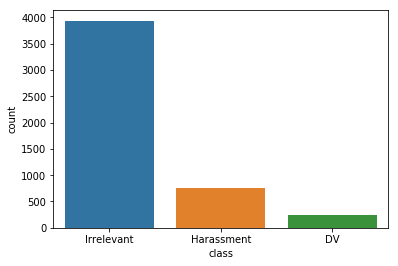

In [206]:
sns.countplot(final_df['class']);
plt.show()

In [207]:
final_df[:3000]['class'].value_counts(normalize=True)

Irrelevant    0.735667
Harassment    0.218667
DV            0.045667
Name: class, dtype: float64

In [208]:
final_df[3000:]['class'].value_counts(normalize=True)

Irrelevant    0.891125
Harassment    0.055728
DV            0.053148
Name: class, dtype: float64

In [209]:
final_df.head()

,class,text,article_length,stemmed_articles
0,Irrelevant,PMC threatens to seize house of ex I-T comm wh...,11397,pmc threaten seiz hous comm refus pay water ch...
1,Irrelevant,"\nMentalhood, Tandav, The Family Man 2, Breath...",9602,mentalhood tandav famili man breath small scre...
2,Irrelevant,In Pic: Nagpur Police extend New Year's greeti...,5539,pic nagpur polic extend new year greet citizen...
3,Irrelevant,\n\n\nPune Police Twitter | Man asks for some ...,7844,pune polic twitter man ask drug exchang dealer...
4,Irrelevant,ICMR-AIIMS emergency mobile service initiative...,7549,icmr aiim emerg mobil servic initi see expans ...


In [210]:
final_df = final_df.rename(columns={'class':'class_label'})

In [211]:
le = preprocessing.LabelEncoder()
le.fit(final_df['class_label'])
final_df['class'] = le.transform(final_df['class_label'])

In [212]:
print (final_df['class'].unique())
print (list(le.inverse_transform(final_df['class'].unique())))

[2 1 0]
['Irrelevant', 'Harassment', 'DV']


In [213]:
final_df.head(5)

,class_label,text,article_length,stemmed_articles,class
0,Irrelevant,PMC threatens to seize house of ex I-T comm wh...,11397,pmc threaten seiz hous comm refus pay water ch...,2
1,Irrelevant,"\nMentalhood, Tandav, The Family Man 2, Breath...",9602,mentalhood tandav famili man breath small scre...,2
2,Irrelevant,In Pic: Nagpur Police extend New Year's greeti...,5539,pic nagpur polic extend new year greet citizen...,2
3,Irrelevant,\n\n\nPune Police Twitter | Man asks for some ...,7844,pune polic twitter man ask drug exchang dealer...,2
4,Irrelevant,ICMR-AIIMS emergency mobile service initiative...,7549,icmr aiim emerg mobil servic initi see expans ...,2


In [214]:
train_df = final_df[:3000]
test_df = final_df[3000:]

## Featurization:

## BAG OF WORDS

### converting data into vectors using BOW unigram

In [215]:
count_vect = CountVectorizer(min_df=5)
unigram_xtrain_vect = count_vect.\
fit_transform(train_df.stemmed_articles)

unigram_xtest_vect = count_vect.transform(test_df.stemmed_articles)

In [216]:
print(unigram_xtrain_vect.shape, unigram_xtest_vect.shape)

(3000, 15998) (1938, 15998)


In [217]:
count_vect.get_feature_names()

['00',
 '000',
 '000z',
 '004',
 '00am',
 '00pm',
 '00usd',
 '01',
 '011',
 '02',
 '0205',
 '023',
 '024',
 '026',
 '027',
 '02t00',
 '02t01',
 '03',
 '035new',
 '03rd',
 '04',
 '0530',
 '056',
 '05th',
 '069',
 '071',
 '074',
 '08portfolioload',
 '091',
 '0amit',
 '0angrezi',
 '0bangalor',
 '0bloodshot3',
 '0covid',
 '0dharala',
 '0follow',
 '0indian',
 '0madha3',
 '0narrow',
 '0pune',
 '0rohit',
 '0stock',
 '0walter2',
 '10',
 '100',
 '1000',
 '10000',
 '100karnataka',
 '100lbs',
 '100million',
 '100padarayanapura',
 '101',
 '102',
 '102krecov',
 '103',
 '103m',
 '104',
 '105',
 '1050',
 '106',
 '107',
 '1075',
 '108',
 '109',
 '10am',
 '10g',
 '10i',
 '10m',
 '10million',
 '10pm',
 '10th',
 '10x',
 '11',
 '110',
 '1100',
 '110002corpor',
 '111',
 '112',
 '113',
 '114',
 '1140',
 '115',
 '116',
 '1162',
 '117',
 '118',
 '119',
 '11am',
 '11min',
 '11newsphotosvideosoper',
 '11oper',
 '11pm',
 '11th',
 '12',
 '120',
 '1200',
 '1200x675',
 '12012',
 '120b',
 '120k',
 '121',
 '122',
 '1

### converting data into vectors using BOW bigram

In [218]:
bigram_count_vect = CountVectorizer(ngram_range=(1,2), min_df=8, max_features=10000)
bigram_xtrain_vect = bigram_count_vect.\
fit_transform(train_df.stemmed_articles)

bigram_xtest_vect = bigram_count_vect.transform(test_df.stemmed_articles)

In [219]:
bigram_xtrain_vect.shape, bigram_xtest_vect.shape

((3000, 10000), (1938, 10000))

In [220]:
bigram_count_vect.get_feature_names()[:15]

['000',
 '000 case',
 '000 crore',
 '000 mark',
 '000 peopl',
 '026',
 '026 item',
 '0covid',
 '0covid 19lockdown',
 '0follow',
 '0follow onfacebooktwitterrss',
 '0indian',
 '0indian railwaysdomest',
 '100',
 '100 revenu']

## TFIDF

### converting data into vectors using TF-IDF unigram

In [221]:
tfidf_uni = TfidfVectorizer(min_df=5, max_features=10000)
tfidf_uni_xtrain_vect = tfidf_uni.\
fit_transform(train_df.stemmed_articles)

tfidf_uni_xtest_vect = tfidf_uni.transform(test_df.stemmed_articles)

In [222]:
print(tfidf_uni_xtrain_vect.shape, tfidf_uni_xtest_vect.shape)

(3000, 10000) (1938, 10000)


### converting data into vectors using TF-IDF bigram

In [223]:
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=10000)
tfidf_xtrain_vect = tfidf.\
fit_transform(train_df.stemmed_articles)

tfidf_xtest_vect = tfidf.transform(test_df.stemmed_articles)

In [224]:
print(tfidf_xtrain_vect.shape, tfidf_xtest_vect.shape)

(3000, 10000) (1938, 10000)


### converting data into vectors using TF-IDF trigram

In [225]:
tfidf_tri = TfidfVectorizer(ngram_range=(1,3), min_df=5, max_features=10000)
tfidf_tri_xtrain_vect = tfidf_tri.\
fit_transform(train_df.stemmed_articles)

tfidf_tri_xtest_vect = tfidf_tri.transform(test_df.stemmed_articles)

In [226]:
print(tfidf_tri_xtrain_vect.shape, tfidf_tri_xtest_vect.shape)

(3000, 10000) (1938, 10000)


In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.calibration import CalibratedClassifierCV

## Applying Logistic regression on BOW unigram,

In [228]:
inverse_lambda = list(np.logspace(np.log(0.00005), np.log(10000), base = np.exp(1), num = 20))

* Lets create a pipiline to test all the ml models and see which is performing best for our case.

In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [230]:
def best_model(x_train, y_train, x_test, y_test):
  pipe = Pipeline([('classifier' , RandomForestClassifier())])
  param_grid = [
                {'classifier' : [LogisticRegression()],
                 'classifier__penalty' : ['l1', 'l2'],
                 'classifier__C' : inverse_lambda,
                 'classifier__class_weight' : [None, 'balanced'],
                 'classifier__solver' : ['liblinear']},
                 {'classifier' : [RandomForestClassifier()],
                  'classifier__n_estimators' : list(range(10,300,10)),
                  'classifier__max_features' : list(range(6,32,5))}
                ]
  clf = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
  best_clf = clf.fit(x_train, y_train)
  print(f'best estimator is {clf.best_estimator_}')

  best_logreg_model = clf.best_params_['classifier']
  best_logreg_model.fit(x_train, y_train)

  unigram_predicts = best_logreg_model.predict(x_test)
  cv_cm = pd.crosstab(y_test, unigram_predicts, rownames=["True Label"], colnames=["predicted label"])
  print("confusion matrix on test data is:")
  print(cv_cm)
  print(" ")
  print("classification report on test data is")
  print(classification_report(y_true=y_test, y_pred=unigram_predicts))

  return best_logreg_model

In [231]:
import pickle

In [232]:
"""over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.2)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)"""
sm = SMOTE()
rus = RandomUnderSampler(replacement = False)
x_train1 = unigram_xtrain_vect; y_train1 = train_df['class']
x_train2, y_train2 = rus.fit_sample(x_train1, y_train1)

In [233]:
unique_elements, counts_elements = np.unique(y_train2, return_counts=True)
print(unique_elements, counts_elements)

[0 1 2] [137 137 137]


In [234]:
unigram_best_model = best_model(x_train=x_train2, y_train=y_train2, x_test=unigram_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  1.5min finished


best estimator is Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.007646304379163406,
                                    solver='liblinear'))])
confusion matrix on test data is:
predicted label   0   1     2
True Label                   
0                78  11    14
1                23  58    27
2                75  47  1605
 
classification report on test data is
              precision    recall  f1-score   support

           0       0.44      0.76      0.56       103
           1       0.50      0.54      0.52       108
           2       0.98      0.93      0.95      1727

    accuracy                           0.90      1938
   macro avg       0.64      0.74      0.68      1938
weighted avg       0.92      0.90      0.91      1938



In [235]:
print (final_df['class'].unique())
print (list(le.inverse_transform(final_df['class'].unique())))

[2 1 0]
['Irrelevant', 'Harassment', 'DV']


In [168]:
filename = 'log_uni_model.sav'
pickle.dump(unigram_best_model, open(filename, 'wb'))

In [0]:
filename = 'count_vect_pickle.sav'
pickle.dump(count_vect, open(filename, 'wb'))

In [0]:
count_vect_loaded = pickle.load(open(filename, 'rb'))

In [0]:
count_vect_loaded.transform([final_df['stemmed_articles'][982]])

<1x7817 sparse matrix of type '<class 'numpy.int64'>'
	with 46 stored elements in Compressed Sparse Row format>

In [169]:
unigram_best_model.predict(count_vect.transform([final_df['stemmed_articles'][982]]))

array([1])

## Now lets get the best model on bigrams Vectorizer

In [236]:
"""over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.2)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)"""
sm = SMOTE()
rus = RandomUnderSampler(replacement = False)
x_train1 = bigram_xtrain_vect; y_train1 = train_df['class']
x_train2, y_train2 = rus.fit_sample(x_train1, y_train1)

In [237]:
bigram_best_model = best_model(x_train=x_train2, y_train=y_train2, x_test=bigram_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  1.7min finished


best estimator is Pipeline(steps=[('classifier',
                 LogisticRegression(C=1.169319413176268,
                                    class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])
confusion matrix on test data is:
predicted label   0   1     2
True Label                   
0                81   8    14
1                25  56    27
2                86  58  1583
 
classification report on test data is
              precision    recall  f1-score   support

           0       0.42      0.79      0.55       103
           1       0.46      0.52      0.49       108
           2       0.97      0.92      0.94      1727

    accuracy                           0.89      1938
   macro avg       0.62      0.74      0.66      1938
weighted avg       0.92      0.89      0.90      1938



## Now lets get the best model on TFIDF unigram Vectorizer

In [238]:
"""over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.2)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)"""
sm = SMOTE()
rus = RandomUnderSampler(replacement = False)
x_train1 = tfidf_uni_xtrain_vect; y_train1 = train_df['class']
x_train2, y_train2 = rus.fit_sample(x_train1, y_train1)

In [239]:
tfidf_uni_best_model = best_model(x_train=x_train2, y_train=y_train2, x_test=tfidf_uni_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  1.4min


best estimator is Pipeline(steps=[('classifier',
                 LogisticRegression(C=8.74431494124236, penalty='l1',
                                    solver='liblinear'))])
confusion matrix on test data is:
predicted label    0   1     2
True Label                    
0                 84   1    18
1                 21  56    31
2                101  30  1596
 
classification report on test data is
              precision    recall  f1-score   support

           0       0.41      0.82      0.54       103
           1       0.64      0.52      0.57       108
           2       0.97      0.92      0.95      1727

    accuracy                           0.90      1938
   macro avg       0.67      0.75      0.69      1938
weighted avg       0.92      0.90      0.90      1938



[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  1.6min finished


In [0]:
# saving the model and vectorizer
tfidf_uni_filename = 'log_tfidf_uni_model.sav'
pickle.dump(tfidf_uni_best_model, open(tfidf_uni_filename, 'wb'))

tfidf_uni_vectorizer_filename = 'tfidf_uni_pickle_vectorizer.sav'
pickle.dump(tfidf_uni, open(tfidf_uni_vectorizer_filename, 'wb'))

In [0]:
tfidf_uni_loaded = pickle.load(open('tfidf_uni_pickle_vectorizer.sav', 'rb'))

## Now lets get the best model on TFIDF bigrams Vectorizer

In [241]:
"""over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.2)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)"""
sm = SMOTE()
rus = RandomUnderSampler(replacement = False)
x_train1 = tfidf_xtrain_vect; y_train1 = train_df['class']
x_train2, y_train2 = rus.fit_sample(x_train1, y_train1)

In [242]:
tfidf_best_model = best_model(x_train=x_train2, y_train=y_train2, x_test=tfidf_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  1.5min finished


best estimator is Pipeline(steps=[('classifier',
                 LogisticRegression(C=3656.820849535991,
                                    class_weight='balanced', penalty='l1',
                                    solver='liblinear'))])
confusion matrix on test data is:
predicted label    0   1     2
True Label                    
0                 93   4     6
1                 34  48    26
2                126  48  1553
 
classification report on test data is
              precision    recall  f1-score   support

           0       0.37      0.90      0.52       103
           1       0.48      0.44      0.46       108
           2       0.98      0.90      0.94      1727

    accuracy                           0.87      1938
   macro avg       0.61      0.75      0.64      1938
weighted avg       0.92      0.87      0.89      1938



## Now lets get the best model on TFIDF trigrams Vectorizer

In [243]:
"""over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.2)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)"""
sm = SMOTE()
rus = RandomUnderSampler(replacement = False)
x_train1 = tfidf_tri_xtrain_vect; y_train1 = train_df['class']
x_train2, y_train2 = rus.fit_sample(x_train1, y_train1)

In [244]:
tfidf_tri_best_model = best_model(x_train=x_train2, y_train=y_train2, x_test=tfidf_tri_xtest_vect, y_test=test_df['class'])

Fitting 3 folds for each of 254 candidates, totalling 762 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 762 out of 762 | elapsed:  1.5min finished


best estimator is Pipeline(steps=[('classifier',
                 LogisticRegression(C=65.39106674363224, penalty='l1',
                                    solver='liblinear'))])
confusion matrix on test data is:
predicted label    0   1     2
True Label                    
0                 78   5    20
1                 19  55    34
2                144  71  1512
 
classification report on test data is
              precision    recall  f1-score   support

           0       0.32      0.76      0.45       103
           1       0.42      0.51      0.46       108
           2       0.97      0.88      0.92      1727

    accuracy                           0.85      1938
   macro avg       0.57      0.71      0.61      1938
weighted avg       0.90      0.85      0.87      1938

